[FROM HERE](https://ranaroussi.github.io/yfinance/index.html)

# [create env](https://docs.python.org/3/library/venv.html)

python3 -m venv venv

# activate venv

source .venv/bin/activate

# show installed python packages

pip3 list

# install additional package

pip3 install yfinance

In [ ]:
import yfinance as yf
dat = yf.Ticker("MSFT")


In [ ]:
dat.info

In [ ]:
dat.calendar

In [ ]:
dat.analyst_price_targets

In [ ]:
dat.quarterly_income_stmt

In [ ]:
dat.history(period='1mo')

In [ ]:
dat.option_chain(dat.options[0]).puts

# [Show complete data](https://stackoverflow.com/questions/67889561/yfinance-print-max-rows-python)

In [ ]:
import yfinance as yf
import pandas as pd
yf.Ticker("MSFT")
dat = yf.download(tickers='AAPL', period='5d', interval='5m')
pd.set_option('display.max_rows', None)
df = pd.DataFrame(dat)

In [ ]:
import yfinance as yf
import pandas as pd

def STOCK(ticker):
    return yf.Ticker(ticker).history(period="max")

def get_stock_prices(tickers):
    data = yf.download(list(tickers), group_by='column', period="1000d", interval='1d')
    return data[['Close', 'Volume']]

def get_financials(ticker):
    tck = yf.Ticker(ticker)
    return tck.get_financials()

def get_multiple_financials(tickers):
    tickers = [yf.Ticker(ticker) for ticker in tickers]
    dfs = [] # list for each ticker's dataframe
    for ticker in tickers:
        # get each financial statement
        pnl = ticker.financials
        bs = ticker.balancesheet
        cf = ticker.cashflow

        # concatenate into one dataframe
        fs = pd.concat([pnl, bs, cf])

        # make dataframe format nicer
        # Swap dates and columns
        data = fs.T
        # reset index (date) into a column
        data = data.reset_index()
        # Rename old index from '' to Date
        data.columns = ['Date', *data.columns[1:]]
        # Add ticker to dataframe
        data['Ticker'] = ticker.ticker
        dfs.append(data)
    df = pd.concat(dfs, ignore_index=True)
    df = df.T.drop_duplicates().T
    df = df.set_index(['Ticker','Date'])
    return df

def get_calls(ticker):
    tck = yf.Ticker(ticker)
    options = tck.option_chain()
    return options.calls

def get_puts(ticker):
    tck = yf.Ticker(ticker)
    options = tck.option_chain()
    return options.puts

def get_institutional_holders(ticker):
    tck = yf.Ticker(ticker)
    return tck.institutional_holders

get_stock_prices("TREX")

In [ ]:
import yfinance as yf
# create ticker for Apple Stock
ticker = yf.Ticker('AAPL')
# get data of the most recent date
todays_data = ticker.history(period='1d')

print(todays_data)


<Axes: title={'center': "APPLE's stock"}, xlabel='Date'>

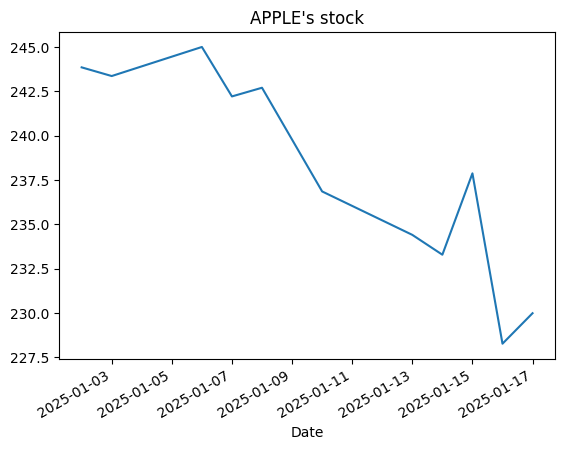

In [20]:
import datetime
 
# startDate , as per our convenience we can modify
startDate = datetime.datetime(2025, 1, 1)
 
# endDate , as per our convenience we can modify
endDate = datetime.datetime(2025, 1, 21)
apple_data = yf.Ticker('AAPL')
# pass the parameters as the taken dates for start and end
aapl_df = apple_data.history(start=startDate, end=endDate)
# plot the close price 
aapl_df['Close'].plot(title="APPLE's stock")
